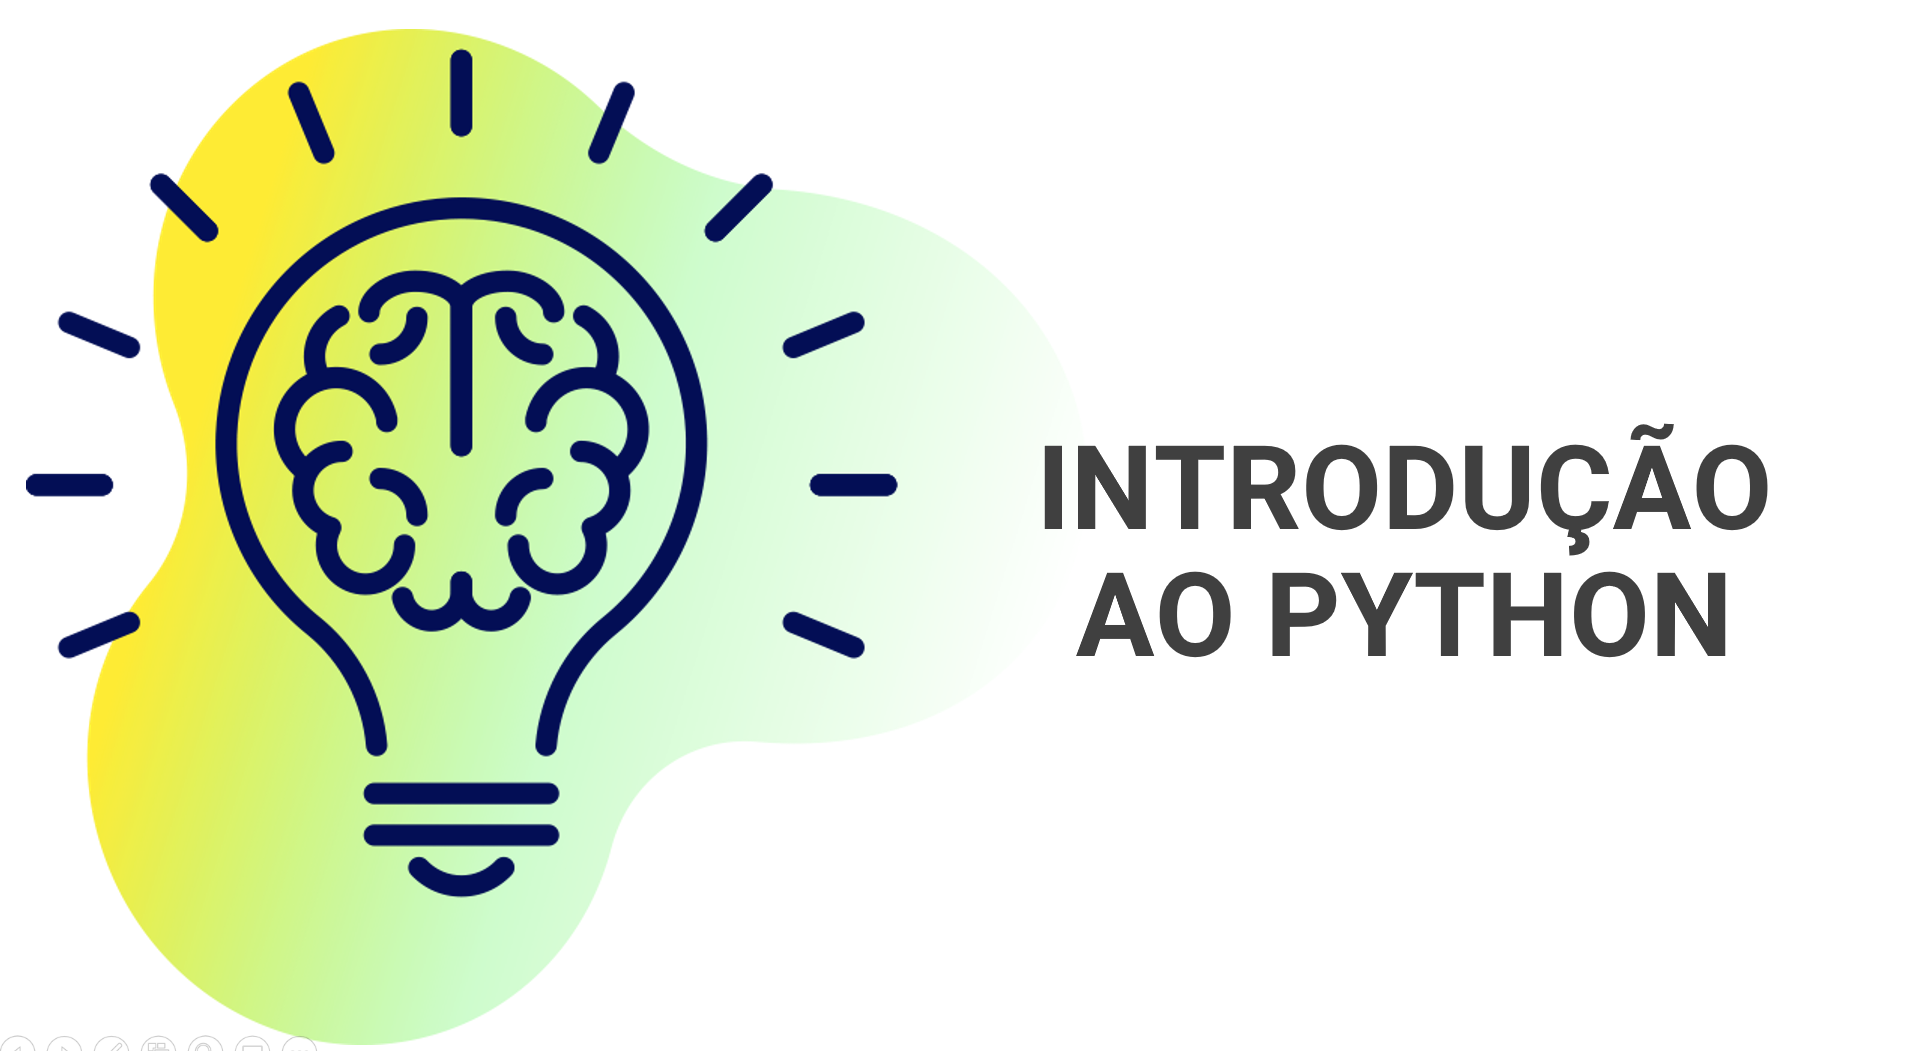

###    prof: Wagner Santos

Ler um arquivo CSV e criar um Dataframe com o PANDAS
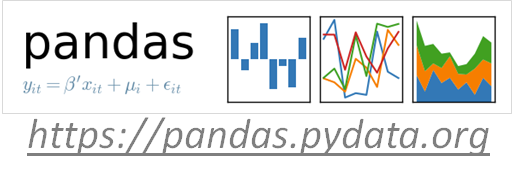

### <font color='gray'> O primeiro passo é importar a biblioteca </font>

In [ ]:
import pandas as pd
pd.options.display.max_columns = None

### <font color='gray'> Vamos importar um dataset com as informações dos bairros de SP </font>
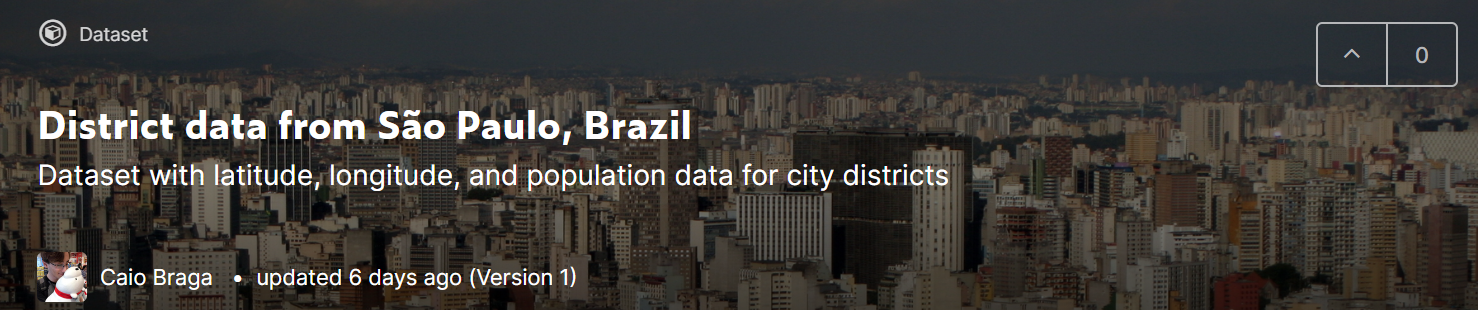

https://www.kaggle.com/caiobsilva/sp-district-coordinates#sp_dist.json

In [ ]:
# função read_json lê um arquivo no formato json - similar a um dicionário
dfBairros = pd.read_json('sp_dist.json', encoding='utf-8')

### <font color='gray'> a função shape permite ver quantas linhas e colunas a base possui </font>

In [ ]:
dfBairros.shape

### <font color='gray'> columns retorna as colunas presentes na base </font>

In [ ]:
dfBairros.columns

In [ ]:
# Função head() retorna os N primeiros registros
dfBairros.head(5)

In [ ]:
# Função tail() retorna os N primeiros registros
dfBairros.tail(5)

In [ ]:
# Com a opção 'display.max_rows' podemos decidir quantos registros aparecem ao apresentar na tela as infos
pd.set_option('display.max_rows', None)
# com sort_values podemos ordenar por uma das colunas
dfBairros.sort_values('Districts', ascending = True)

### <font color='gray'> info() mostra os tipos das colunas e se todos os dados estão preenchidos </font>

In [ ]:
dfBairros.info()

### <font color='gray'> describe() mostra um resumo estatístico das variáveis numéricas </font>

In [ ]:
dfBairros.describe()

## Recuperar informações de um dataframe com o PANDAS

### <font color='gray'> seleção de dados por coluna </font>

In [ ]:
dfBairros['Districts']

### <font color='gray'> seleção de múltiplas colunas </font>

In [ ]:
dfBairros[['Latitude', 'Longitude']]

### <font color='gray'> seleção de múltiplas linhas </font>

In [ ]:
dfBairros.loc[3:20]

### <font color='gray'> seleção por um critério de busca </font>

In [ ]:
dfBairros['Population']

### <font color='gray'> ajustar coluna de população - tratar o ponto separador </font>

In [ ]:
# converte dados de população para STRING
dfBairros['Population'] = dfBairros['Population'].astype(str)

In [ ]:
# retira o ponto separador de cada registro
dfBairros['Population'] = dfBairros['Population'].str.replace('.', '')

In [ ]:
dfBairros['Population']

In [ ]:
# converte os dados para o tipo Inteiro
dfBairros['Population'] = dfBairros['Population'].astype(int)

In [ ]:
# verificar como o dataframe ficou
dfBairros.info()

### <font color='gray'> busca dados utilizando a população como um critério de busca </font>

In [ ]:
dfBairros.loc[dfBairros['Population'] > 150000]

In [ ]:
# seleção através de um critério de busca - texto
dfBairros.loc[dfBairros['Districts'] == 'Jabaquara']

In [ ]:
# utilização do OR '|' para trazer mais de um bairro 
dfBairros.loc[(dfBairros['Districts'] == 'Jabaquara') | (dfBairros['Districts'] == 'Grajaú')]

# Dataset Netflix
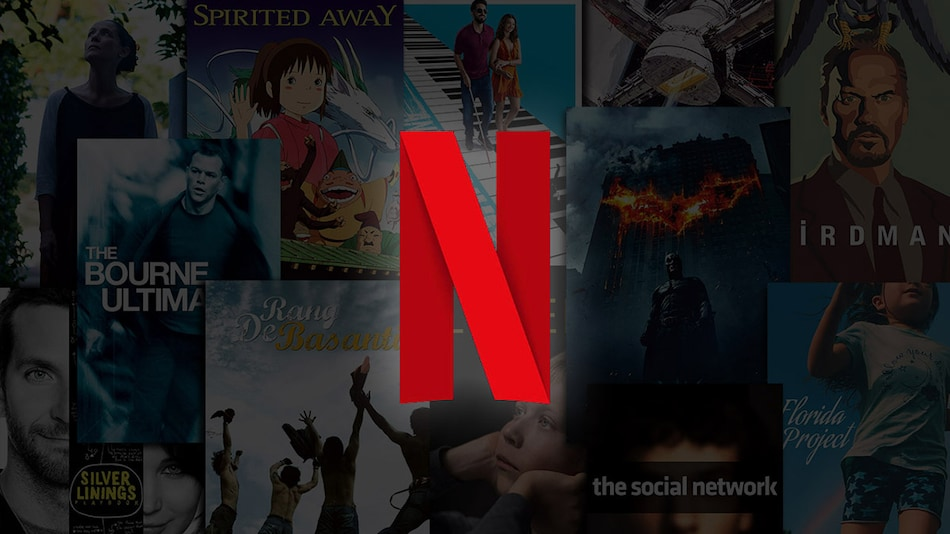
fontes: 
- https://www.kaggle.com/shivamb/netflix-shows
- https://www.kaggle.com/manavsaxena/beginner-friendly-netflix-movies-shows-analysis

In [ ]:
# import bibliotecas
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [ ]:
# bibiliotecas de visualização
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### <font color='gray'> leitura arquivo csv </font>

In [ ]:
df = pd.read_csv('netflix_titles.csv')

### <font color='gray'> comando shape - mostra quantidade de linhas e colunas </font>

In [ ]:
df.shape

### <font color='gray'> columns - lista as colunas do dataset </font>

In [ ]:
df.columns

### <font color='gray'> head - mostra os primeiros registros </font>

In [ ]:
df.head()

### <font color='gray'> tail - mostra os últimos registros </font>

In [ ]:
df.tail()

### <font color='gray'> types - mostra os tipos das colunas </font>

In [ ]:
df.dtypes # Default data types assigned to the columns

### <font color='gray'> info - resumo com os dados das colunas </font>

In [ ]:
df.info()

### <font color='gray'> isnull() e sum() registros com valores nulos </font>

In [ ]:
df.isnull().sum()

### <font color='gray'> funções para conversão em formatos de datas </font>

In [ ]:
 # converte 'date_added' para o tipo datetype
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# adiciona coluna 'year_added' a partir do ano em 'date_added'
df['year_added'] = df['date_added'].dt.year
# adiciona coluna 'month_added' a partir do mes em 'date_added'
df['month_added'] = df['date_added'].dt.month 

### <font color='gray'> 'drop' da coluna de ID - show added </font>

In [ ]:
df = df.drop(columns='show_id') # dropping the 'show_id' column

### Seleção de obras feitas no Brasil

In [ ]:
df.loc[df['country'] == 'Brazil']

In [ ]:
# seleção de campos que tenham o Brasil como um dos participantes na elaboração da obra
df[df['country'].notnull() & df['country'].str.contains('Brazil')]

### Contagem de programas de TV x Filmes na Netflix

### <font color='gray'> value_counts() contabiliza a quantidade de ocorrências em uma coluna </font>

In [ ]:
tv_vs_movies_count = df['type'].value_counts()
tv_vs_movies_count

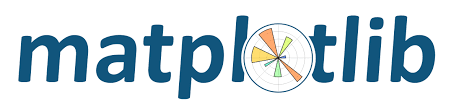

### <font color='gray'> gráfico de pizza/torta com matplotlib </font>

In [ ]:
plt.figure(figsize=(4,4), dpi=120)
plt.pie(tv_vs_movies_count.values, 
        labels=tv_vs_movies_count.index, 
        autopct='%.2f' 
       )
plt.title('Filmes vs Programas TV', fontsize=10);

### Diretores com mais obras

### <font color='gray'> utilização do 'loc' para selecionar registros </font>

In [ ]:
most_directions = df.loc[df['director'].notnull(), 'director'].value_counts().head(10)
most_directions

### <font color='gray'> gráfico de barras 'barplot' com o seaborn </font>

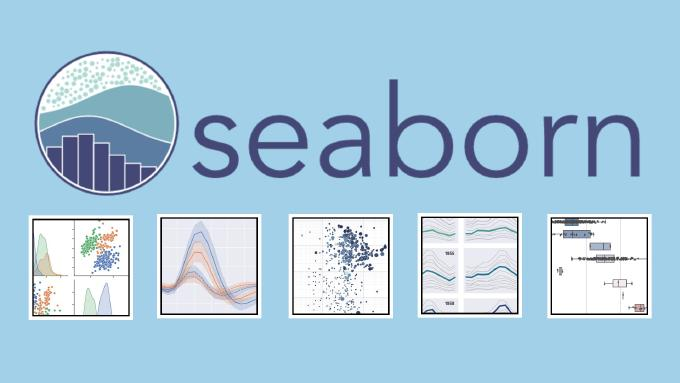

In [ ]:
sns.barplot(x=most_directions.values, y=most_directions.index)
plt.xticks(np.arange(1,20,1))
plt.xlabel('# de obras dirigidas')
plt.ylabel('Diretores')
plt.tight_layout()
plt.title('Mais Filmes/Séries Dirigidos');

### Distribuição da duração para Filmes e Programas de TV

### <font color='gray'> duração dos filmes </font>

In [ ]:
# seleciona registros que são filmes
movies = df.loc[df['type'] == 'Movie'] 

In [ ]:
# Total filmes (função len() - length) 
len(movies) 

In [ ]:
# verifica se todos filmes possuem o texto 'mins'
movies['duration'].str.contains('min').sum()

In [ ]:
# converte para numérico (inteiro) com 'to_numeric' e retira o 'min' através da função replace()
movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''))

In [ ]:
# vamos verificar se os dados de duração dos filmes podem ser utilizados agora
movies.head(5)

### <font color='gray'> histograma com a distribuição da duração dos filmes </font>

In [ ]:
sns.histplot(data=movies, x='duration', bins=np.arange(0,300,20), kde=True)
plt.xticks(ticks=np.arange(0,300,20))
plt.title('Movie Duration Distribution')
plt.ylabel('# of Movies')
plt.xlabel('Duration in minutes')
plt.tight_layout();

### <font color='gray'> duração dos programas de TV </font>

In [ ]:
# seleciona programas de TV
tv_shows = df.loc[df['type'] == 'TV Show'] 

In [ ]:
# total registros - programas de TV
len(tv_shows['duration'])

tv_shows['duration'].str.contains('Season').sum() # Duration for all TV Shows is measured in Seasons

In [ ]:
# utilização do value_counts para determinar a quantidade de registros com cada quantidade de temporadas
tv_shows['duration'].value_counts()

### <font color='gray'> histograma com a distribuição da duração dos filmes </font>

In [ ]:
plt.figure(figsize=(15,6), dpi=200)

sns.countplot(data=tv_shows, x='duration', order=tv_shows['duration'].value_counts().index);
plt.xticks(rotation=90);

plt.title("Shows TV - distribuição da duração - em temporadas")
plt.ylabel('# Shows TV')
plt.xlabel('Duração em temporadas')
plt.tight_layout();

### Análise dos últimos 5 anos

In [ ]:
df['year_added'].value_counts().sort_index(ascending=False)

In [ ]:
past_10_years = df.loc[df['year_added'] >= 2015]

ticks = sorted(list(past_10_years['year_added'].value_counts().index))
labels = [int(tick) for tick in ticks]

sns.countplot(data=past_10_years, x='year_added', hue='type', palette='viridis')
plt.xticks(ticks=np.arange(0,7,1), labels=labels)
plt.xlabel('Programas adicionados')
plt.ylabel('Ano')
plt.legend(loc=("upper left"), ncol=2)
plt.title('Programas adicionados nos últimos 5 anos');
